In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("./datasets/housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


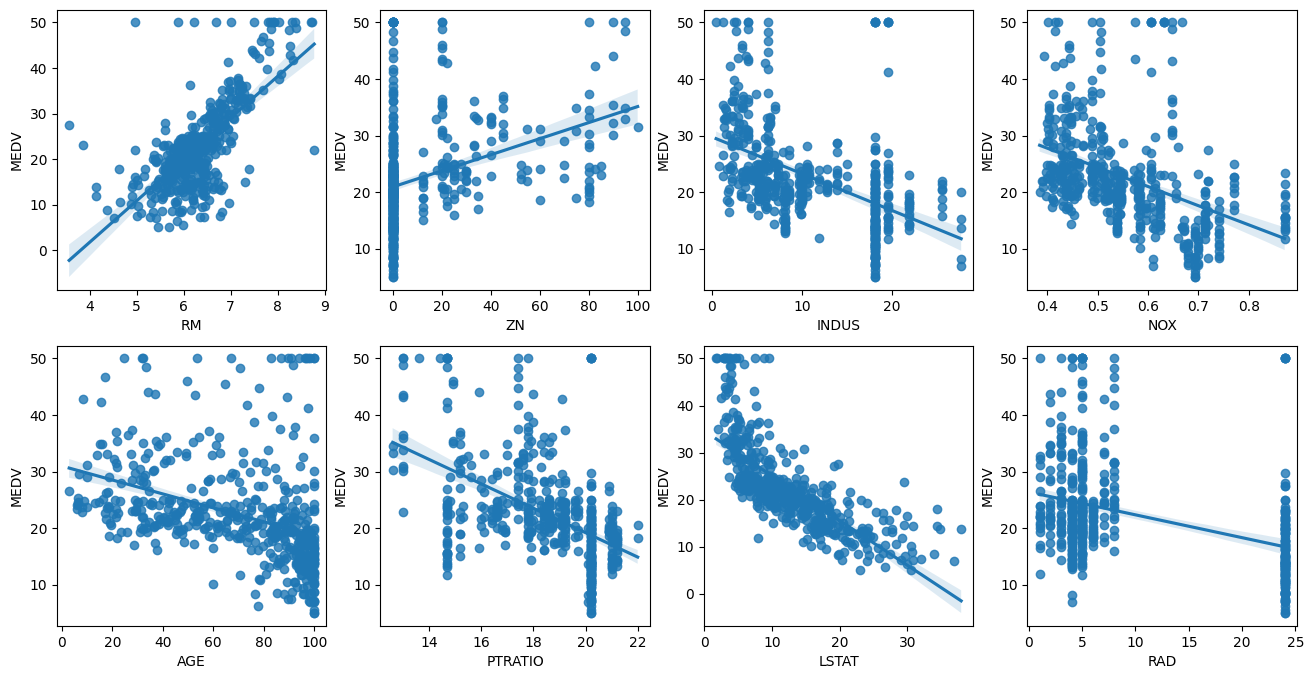

In [12]:
fig, axs = plt.subplots(figsize = (16,8), ncols=4 , nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features) : 
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y = 'MEDV', data = df, ax=axs[row][col])

In [19]:
data = df.drop("MEDV", axis =1 )
label = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse}, RMSE : {rmse}')
print(f'Variance score : {r2_score(y_test, pred)}')

MSE : 3.2136683441244394, RMSE : 1.7926707294214517
Variance score : 0.7572263323138932


In [22]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', lr.coef_)

절편 값 :  40.995595172164414
회귀 계수 값 :  [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]
